In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score

In [2]:
df=pd.read_csv(r"C:\Users\Aaditya\Desktop\Intellipaat\Jupyter_Notebook_Directory\dataset\customer_segmentation.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.shape

(2000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.drop("ID",axis=1,inplace=True)

In [6]:
df.isnull().sum()/100

Sex                0.0
Marital status     0.0
Age                0.0
Education          0.0
Income             0.0
Occupation         0.0
Settlement size    0.0
dtype: float64

# Feature Engineering

#Need to transform the income column beacuse it can contain salary in different currency so it would be standardize the income.

In [7]:
df["log_income"]=np.log(df[["Income"]])

In [8]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,log_income
0,0,0,67,2,124670,1,2,11.733426
1,1,1,22,1,150773,1,2,11.923531
2,0,0,49,1,89210,0,0,11.398748
3,0,0,45,1,171565,1,1,12.052717
4,0,0,53,1,149031,1,1,11.911910


In [9]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'log_income'],
      dtype='object')

# Fitting data in K-Means Clustering

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
X=df[["Sex", "Marital status", "Age", "Education", "Occupation",
       "Settlement size", "log_income"]]
X.head()

,Sex,Marital status,Age,Education,Occupation,Settlement size,log_income
0,0,0,67,2,1,2,11.733426
1,1,1,22,1,1,2,11.923531
2,0,0,49,1,0,0,11.398748
3,0,0,45,1,1,1,12.052717
4,0,0,53,1,1,1,11.911910


In [12]:
wcss=[]
sil_score=[]
random_clusters=range(2,7)
for i in random_clusters:
    k_model=KMeans(n_clusters=i,max_iter=150,random_state=42)
    labels=k_model.fit_predict(X)
    wcss.append(k_model.inertia_)
    sil_score.append(silhouette_score(X,labels))
    print("With in sum of squared error (WCSS) at K= ",i,k_model.inertia_)
    print("Silhouette Coefficient : %0.3f"%silhouette_score(X,labels))
    print("calinski_harabasz_score : %0.3f"%calinski_harabasz_score(X,labels))
    print("davies_bouldin_score : %0.3f"%davies_bouldin_score(X,labels))

With in sum of squared error (WCSS) at K=  2 88313.58766373784
Silhouette Coefficient : 0.616
calinski_harabasz_score : 4304.782
davies_bouldin_score : 0.563
With in sum of squared error (WCSS) at K=  3 42744.087589222116
Silhouette Coefficient : 0.552
calinski_harabasz_score : 5509.332
davies_bouldin_score : 0.566
With in sum of squared error (WCSS) at K=  4 25381.401102352633
Silhouette Coefficient : 0.517
calinski_harabasz_score : 6637.444
davies_bouldin_score : 0.580
With in sum of squared error (WCSS) at K=  5 18185.11273492832
Silhouette Coefficient : 0.481
calinski_harabasz_score : 7141.917
davies_bouldin_score : 0.614
With in sum of squared error (WCSS) at K=  6 14102.514771759757
Silhouette Coefficient : 0.443
calinski_harabasz_score : 7479.326
davies_bouldin_score : 0.665


#Ploting elbow curve for finding optimized value of K

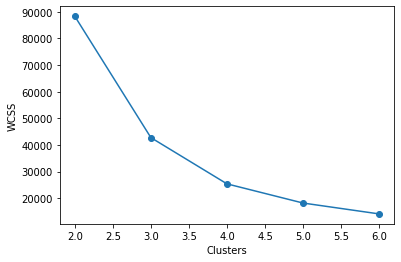

In [13]:
plt.plot(random_clusters,wcss,marker="o")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

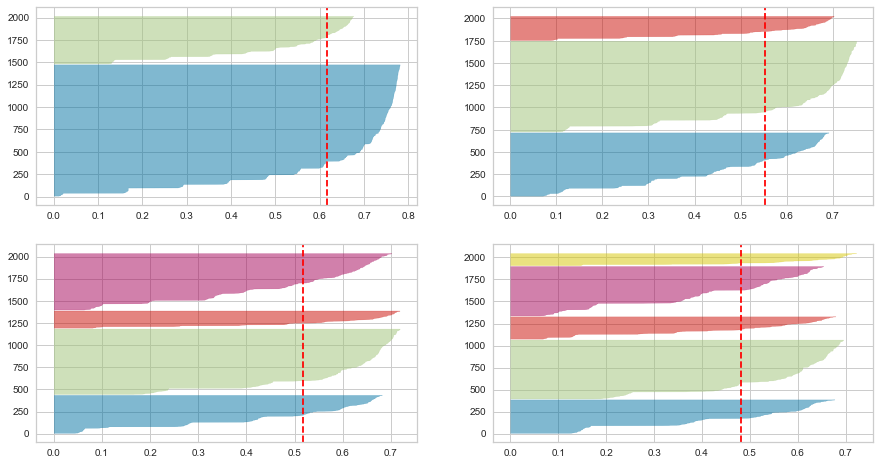

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
      q, mod = divmod(i, 2)
      km = KMeans(n_clusters=i, random_state=42)
      visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
      visualizer.fit(X)

In [15]:
k_model=KMeans(n_clusters=3,max_iter=150,random_state=42)
k_model.fit(X)
labels=k_model.labels_
print("Silhouette Coefficient : %0.3f"%silhouette_score(X,labels))
print("calinski_harabasz_score : %0.3f"%calinski_harabasz_score(X,labels))
print("davies_bouldin_score : %0.3f"%davies_bouldin_score(X,labels))

Silhouette Coefficient : 0.552
calinski_harabasz_score : 5509.332
davies_bouldin_score : 0.566


In [16]:
df["labels"]=labels

In [17]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,log_income,labels
0,0,0,67,2,124670,1,2,11.733426,2
1,1,1,22,1,150773,1,2,11.923531,1
2,0,0,49,1,89210,0,0,11.398748,0
3,0,0,45,1,171565,1,1,12.052717,0
4,0,0,53,1,149031,1,1,11.911910,2


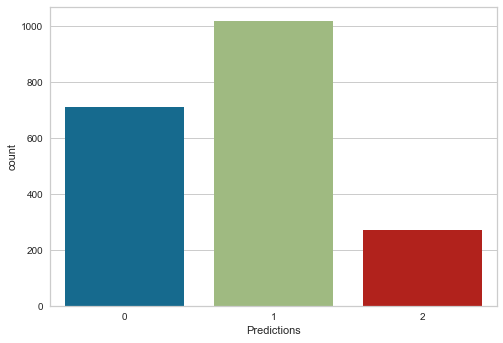

In [18]:
sns.countplot(data=df,x="labels")
plt.xlabel("Predictions")
plt.show()